### Liste des modules à importer

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import base64
import string
import re
import nltk

from collections import Counter
from time import time

# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

#!pip install pywaffle
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("genesis")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GRETA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GRETA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\GRETA\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GRETA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\GRETA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import requests

url = "https://raw.githubusercontent.com/linogaliana/python-datascientist/master/content/NLP/get_data.py"
r = requests.get(url, allow_redirects=True)
open("getdata.py", "wb").write(r.content)

import getdata

train = getdata.create_train_dataframes()

In [3]:
train.head()

Text Author     ID
Id                                                                      
id26305  This process, however, afforded me no means of...    EAP  26305
id17569  It never once occurred to me that the fumbling...    HPL  17569
id11008  In his left hand was a gold snuff box, from wh...    EAP  11008
id27763  How lovely is spring As we looked from Windsor...    MWS  27763
id12958  Finding nothing else, not even gold, the Super...    HPL  12958

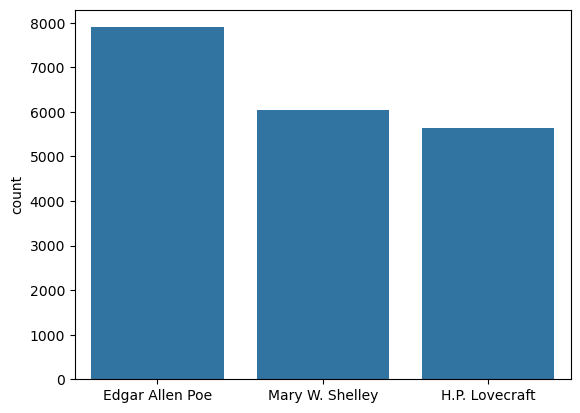

In [4]:
fig = plt.figure()
g = sns.barplot(
    x=["Edgar Allen Poe", "Mary W. Shelley", "H.P. Lovecraft"],
    y=train["Author"].value_counts(),
)

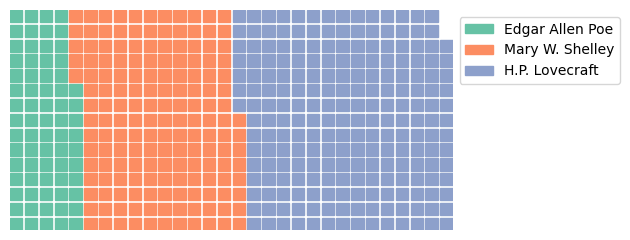

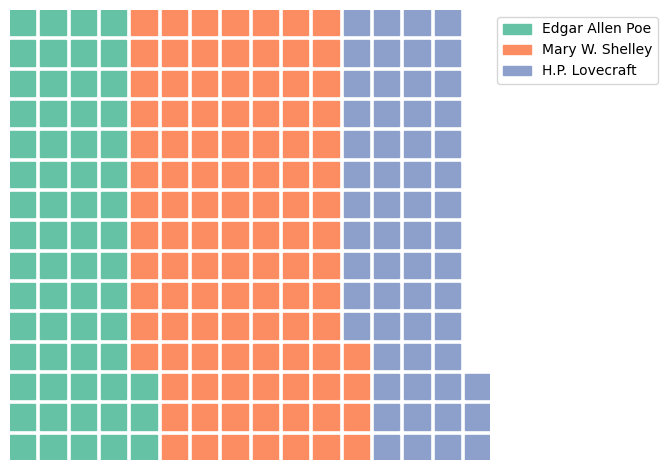

In [5]:
# Function to count the number of sentences where a word appears
def count_word_in_sentences(df, word):
    df['contains_word'] = df['Text'].apply(lambda x: sum([1 for sent in nltk.sent_tokenize(x) if word in sent.lower()]))
    return df.groupby('Author')['contains_word'].sum()

# Count the number of sentences where "fear" appears
fear_counts = count_word_in_sentences(train, 'fear')

# Count the number of sentences where "horror" appears
horror_counts = count_word_in_sentences(train, 'horror')

# Create a Waffle chart for fear counts
fig = plt.figure(
    FigureClass=Waffle,
    rows=15,
    values=fear_counts,
    labels=["Edgar Allen Poe", "Mary W. Shelley", "H.P. Lovecraft"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

# Create a Waffle chart for horror counts
fig = plt.figure(
    FigureClass=Waffle,
    rows=15,
    values=horror_counts,
    labels=["Edgar Allen Poe", "Mary W. Shelley", "H.P. Lovecraft"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

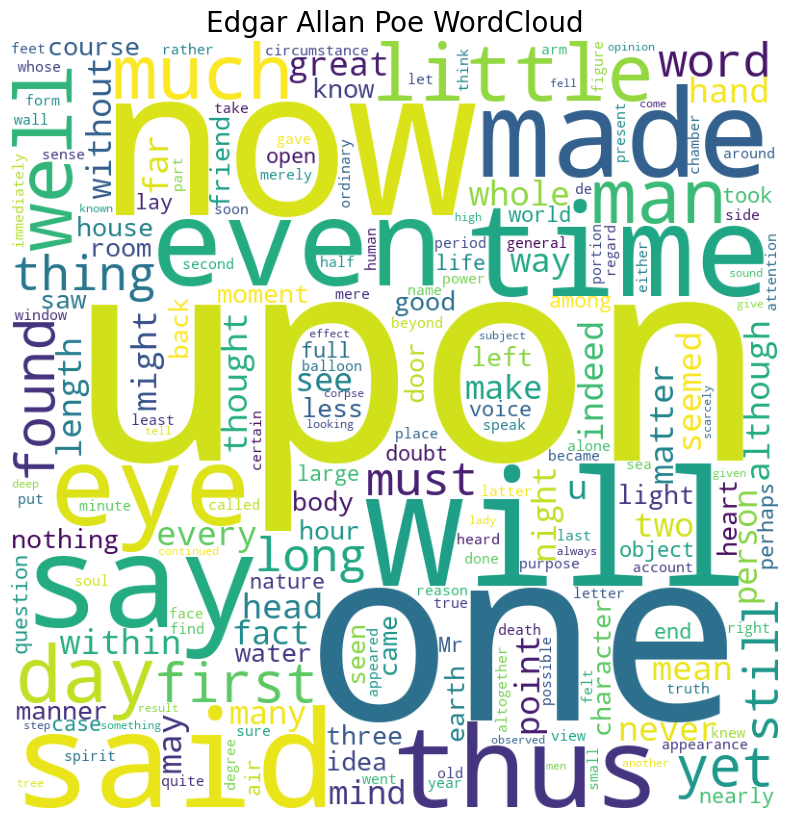

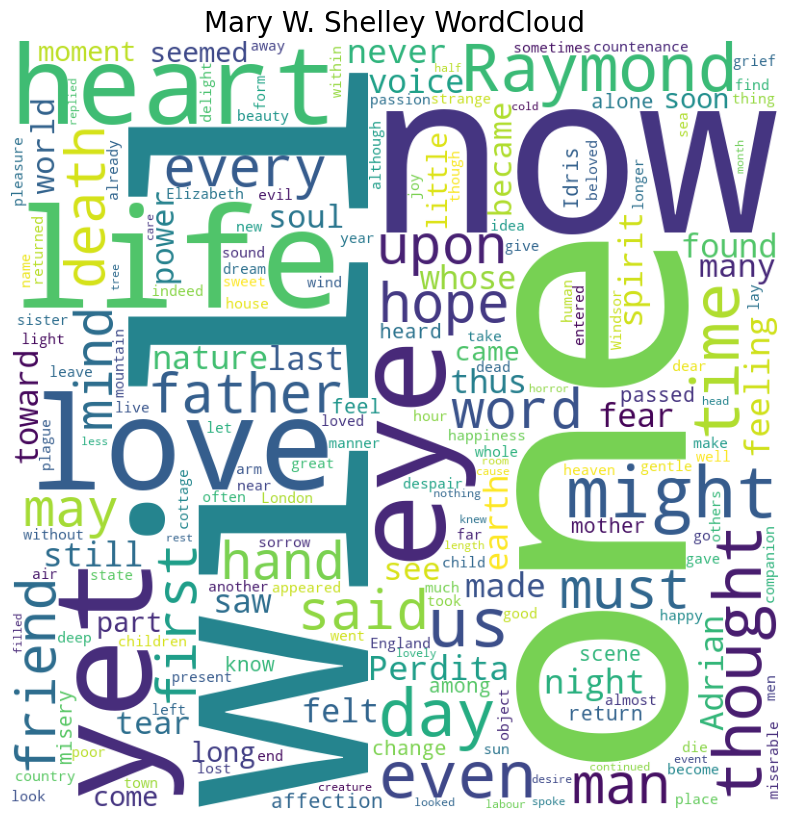

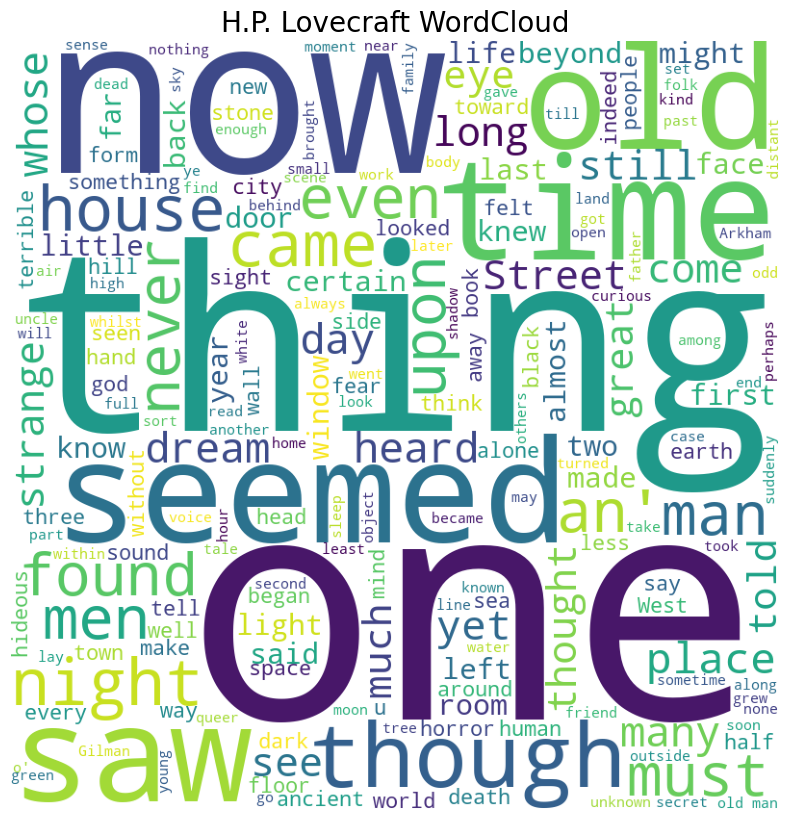

In [6]:
# Fonction pour générer un nuage de mots
def generate_wordcloud(text, title):
    if text.strip():  # Vérifier si le texte n'est pas vide
        wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(title, fontsize=20)
        plt.tight_layout(pad=0)
        plt.show()
    else:
        print(f"No content for {title}.")

# Séparer les textes par auteur sans inclure la colonne 'contains_word'
poe_text = ' '.join(train[train['Author'] == 'EAP']['Text'])
shelley_text = ' '.join(train[train['Author'] == 'MWS']['Text'])
lovecraft_text = ' '.join(train[train['Author'] == 'HPL']['Text'])

# Générer les nuages de mots
generate_wordcloud(poe_text, 'Edgar Allan Poe WordCloud')
generate_wordcloud(shelley_text, 'Mary W. Shelley WordCloud')
generate_wordcloud(lovecraft_text, 'H.P. Lovecraft WordCloud')

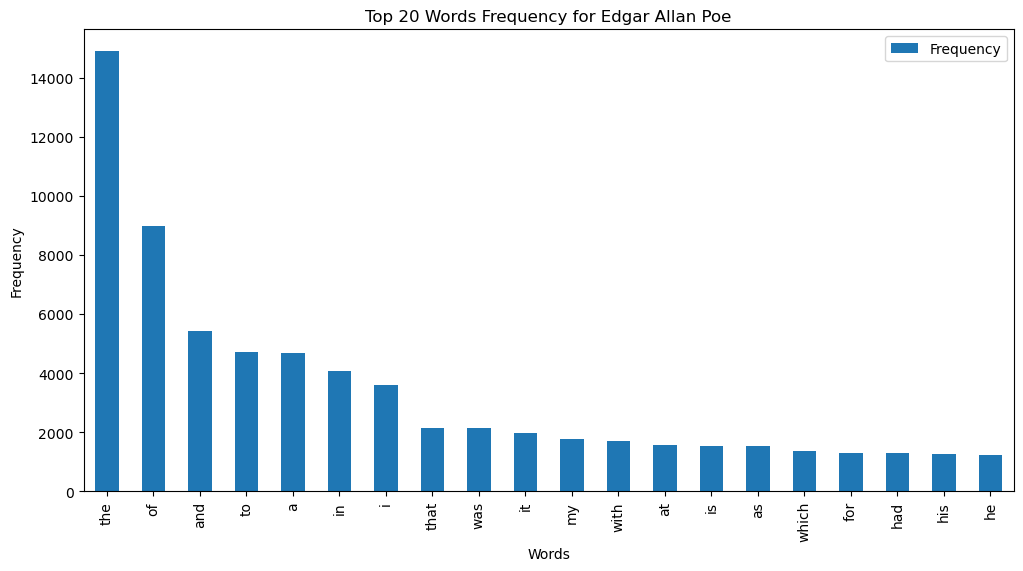

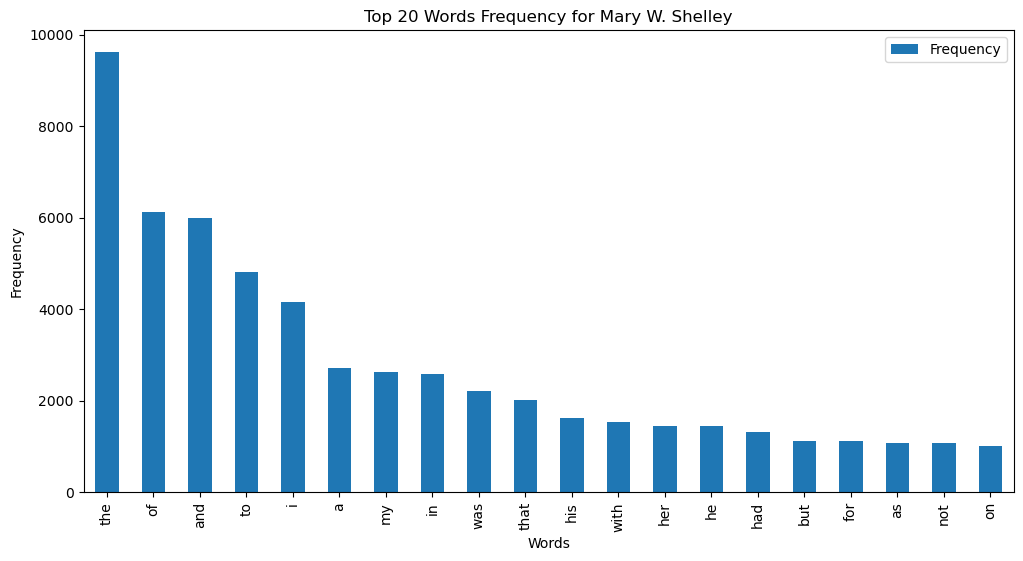

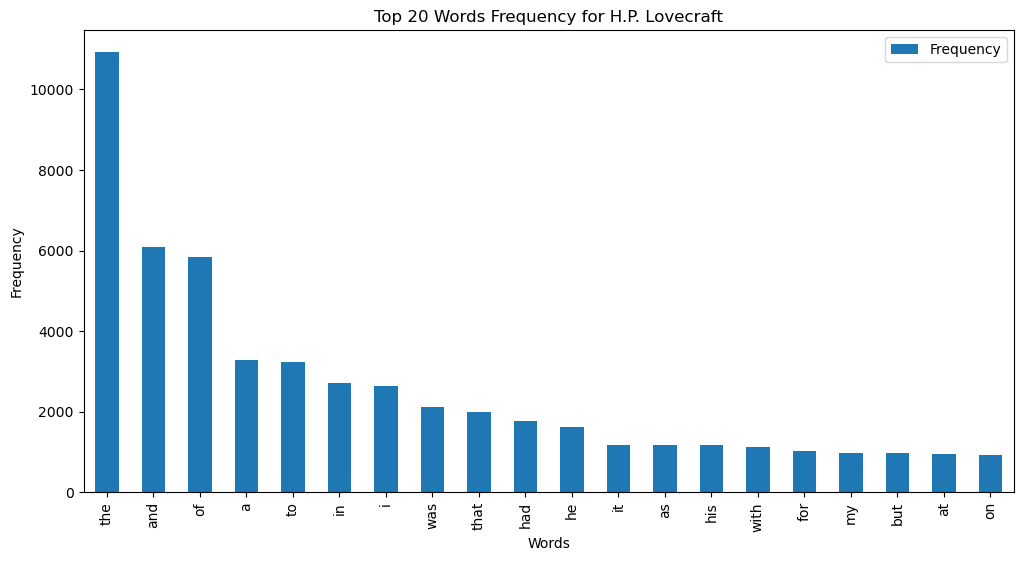

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

# Fonction pour compter les fréquences des mots
def count_words(text):
    # Tokenisation des mots
    words = text.lower().split()
    # Comptage des fréquences
    word_counts = Counter(words)
    return word_counts

# Compter les fréquences des mots pour chaque auteur
poe_word_counts = count_words(poe_text)
shelley_word_counts = count_words(shelley_text)
lovecraft_word_counts = count_words(lovecraft_text)

# Créer un histogramme des fréquences pour chaque auteur
def plot_word_frequency(word_counts, author_name):
    # Convertir le Counter en DataFrame pour faciliter la visualisation
    df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Frequency'])
    # Trier les mots par fréquence
    df = df.sort_values(by='Frequency', ascending=False)
    
    # Afficher les 20 premiers mots les plus fréquents
    df.head(20).plot(kind='bar', x='Word', y='Frequency', figsize=(12, 6), title=f'Top 20 Words Frequency for {author_name}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Afficher les histogrammes des fréquences pour chaque auteur
plot_word_frequency(poe_word_counts, 'Edgar Allan Poe')
plot_word_frequency(shelley_word_counts, 'Mary W. Shelley')
plot_word_frequency(lovecraft_word_counts, 'H.P. Lovecraft')

In [8]:
count_words = pd.DataFrame(
    {
        "counter": train.groupby("Author")
        .apply(lambda s: " ".join(s["Text"]).split(), include_groups=False)
        .apply(lambda s: Counter(s))
        .apply(lambda s: s.most_common())
        .explode()
    }
)
count_words[["word", "count"]] = pd.DataFrame(
    count_words["counter"].tolist(), index=count_words.index
)
count_words = count_words.reset_index()

count_words = count_words.assign(
    tot_mots_auteur=lambda x: (x.groupby("Author")["count"].transform("sum")),
    freq=lambda x: x["count"] / x["tot_mots_auteur"],
    rank=lambda x: x.groupby("Author")["count"].transform("rank", ascending=False),
)

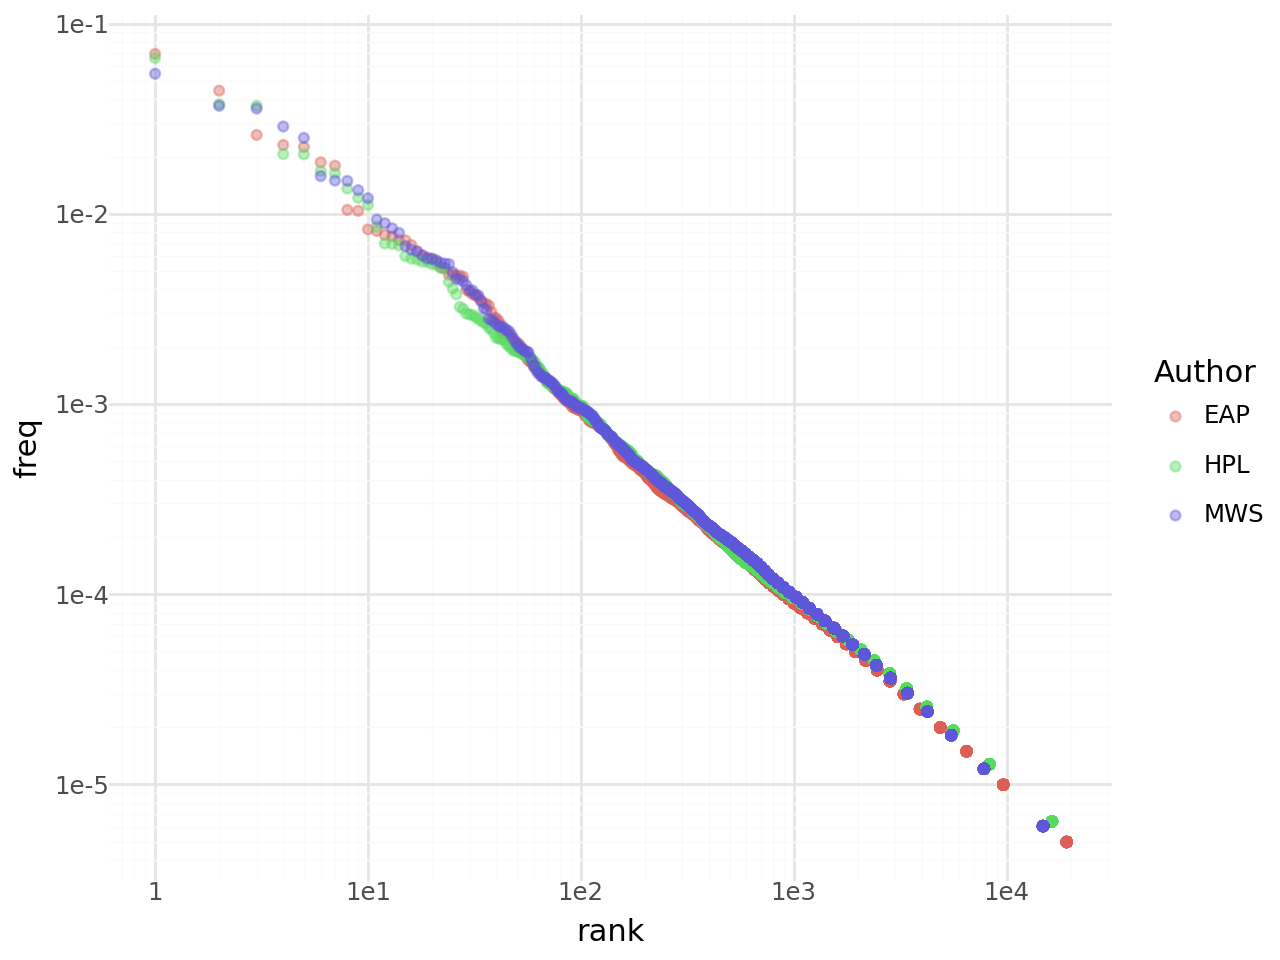

In [9]:
from plotnine import *

(
    ggplot(count_words)
    + geom_point(aes(y="freq", x="rank", color="Author"), alpha=0.4)
    + scale_x_log10()
    + scale_y_log10()
    + theme_minimal()
)

In [10]:
import statsmodels.api as sm

exog = sm.add_constant(np.log(count_words["rank"].astype(float)))

model = sm.GLM(
    count_words["freq"].astype(float), exog, family=sm.families.Poisson()
).fit()

# Afficher les résultats du modèle
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   freq   No. Observations:                69301
Model:                            GLM   Df Residuals:                    69299
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.011
Date:                Wed, 17 Apr 2024   Deviance:                     0.065676
Time:                        15:05:08   Pearson chi2:                   0.0656
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0002431
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4388      1.089     -2.239      0.0

### Nettoyage du texte

In [11]:
from nltk import word_tokenize
from nltk.corpus import stopwords

# Charger les stopwords
stop_words = set(stopwords.words('english'))

# Fonction pour tokeniser et supprimer les stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.isalpha()]
    return filtered_tokens

# Appliquer la fonction à chaque texte dans la colonne 'Text'
train['Filtered_Text'] = train['Text'].apply(tokenize_and_remove_stopwords)

# Créer un nouveau DataFrame avec les textes tokenisés et sans stopwords
train_filtered = train[['Author', 'Filtered_Text']].copy()

# Afficher les premières lignes du nouveau DataFrame
print(train_filtered.head())

        Author                                      Filtered_Text
Id                                                               
id26305    EAP  [process, however, afforded, means, ascertaini...
id17569    HPL  [never, occurred, fumbling, might, mere, mistake]
id11008    EAP  [left, hand, gold, snuff, box, capered, hill, ...
id27763    MWS  [lovely, spring, looked, Windsor, Terrace, six...
id12958    HPL  [Finding, nothing, else, even, gold, Superinte...


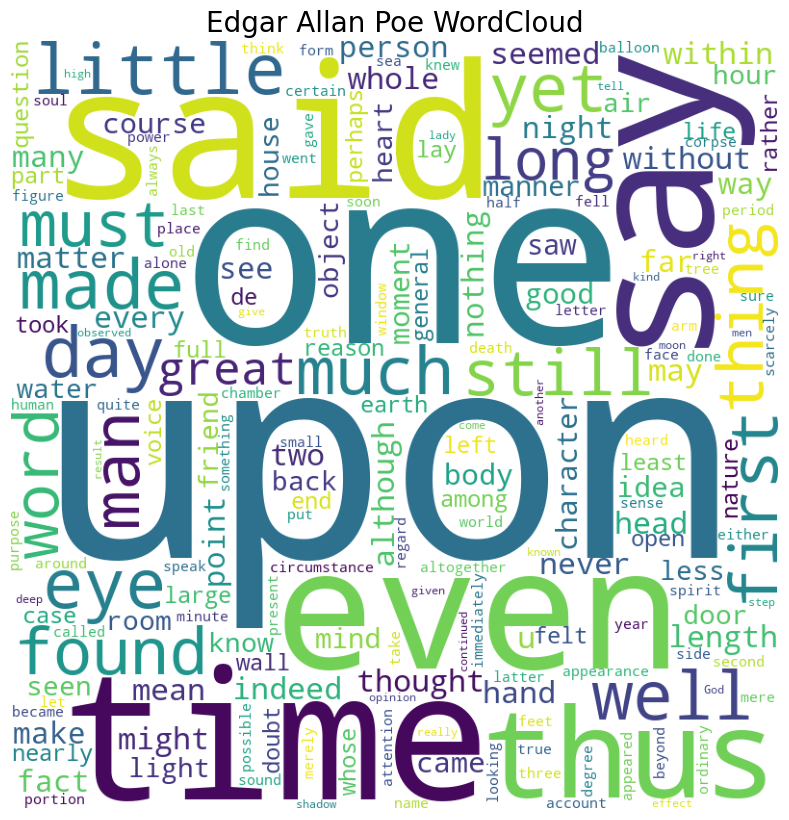

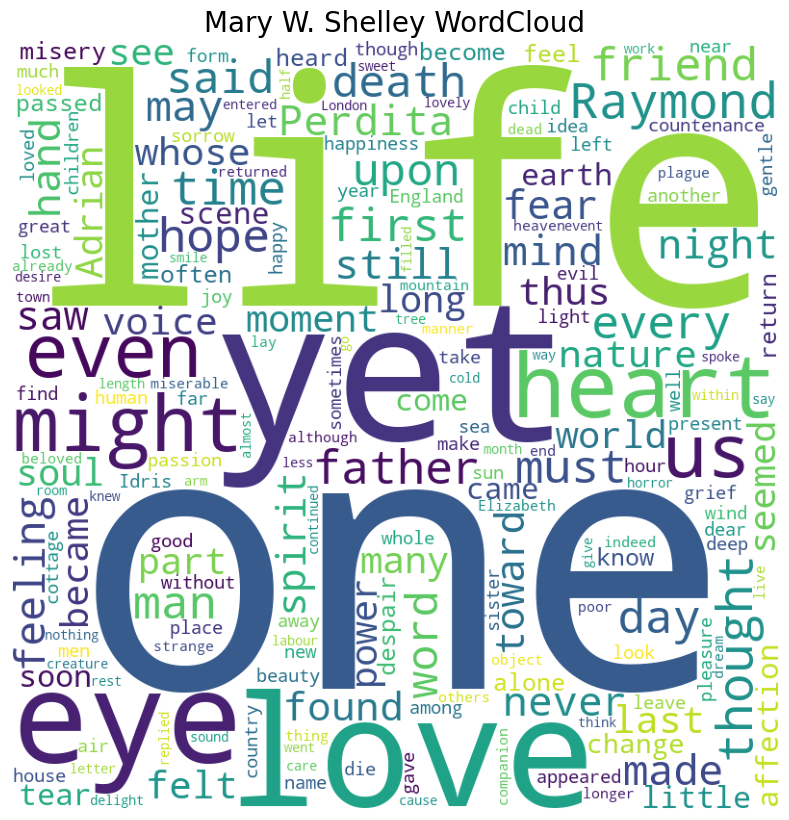

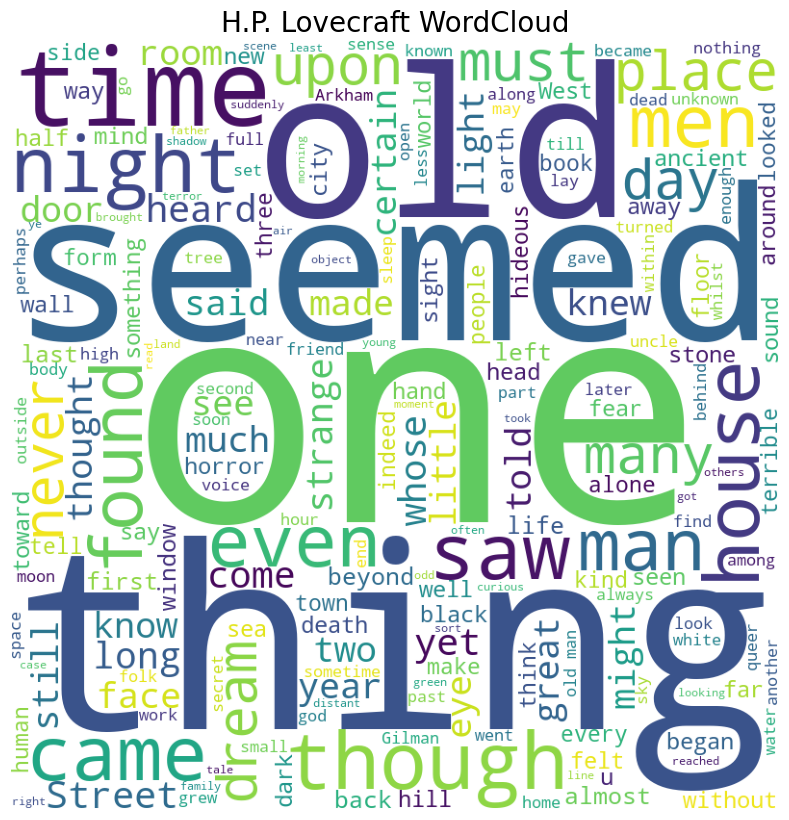

In [12]:
# Séparer les textes par auteur sans inclure la colonne 'contains_word'
poe_filtered_text = ' '.join([' '.join(tokens) for tokens in train_filtered[train_filtered['Author'] == 'EAP']['Filtered_Text']])
shelley_filtered_text = ' '.join([' '.join(tokens) for tokens in train_filtered[train_filtered['Author'] == 'MWS']['Filtered_Text']])
lovecraft_filtered_text = ' '.join([' '.join(tokens) for tokens in train_filtered[train_filtered['Author'] == 'HPL']['Filtered_Text']])

# Générer les nuages de mots
generate_wordcloud(poe_filtered_text, 'Edgar Allan Poe WordCloud')
generate_wordcloud(shelley_filtered_text, 'Mary W. Shelley WordCloud')
generate_wordcloud(lovecraft_filtered_text, 'H.P. Lovecraft WordCloud')

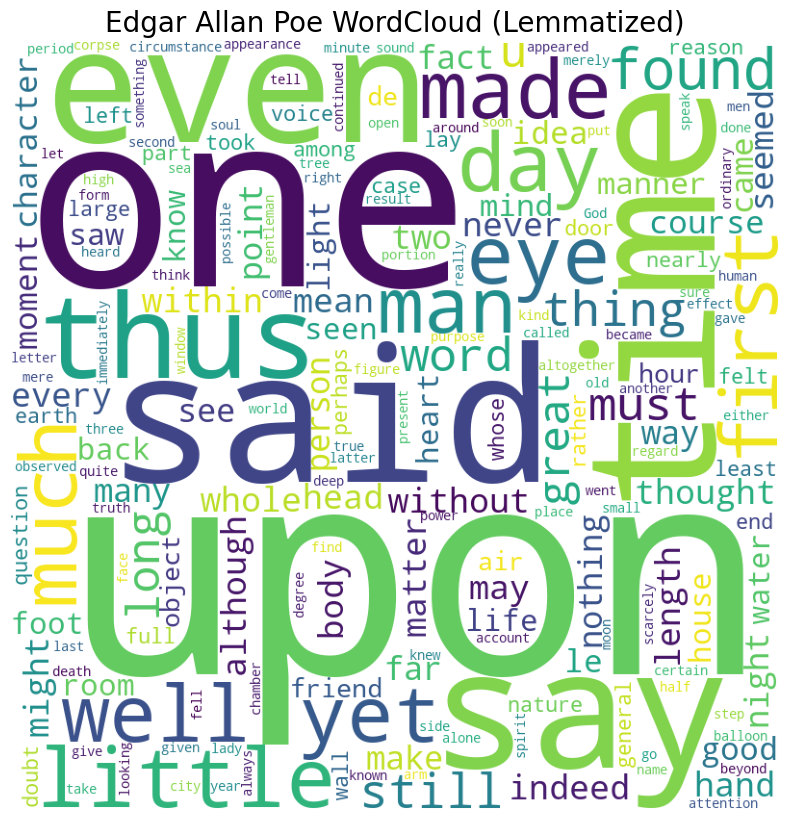

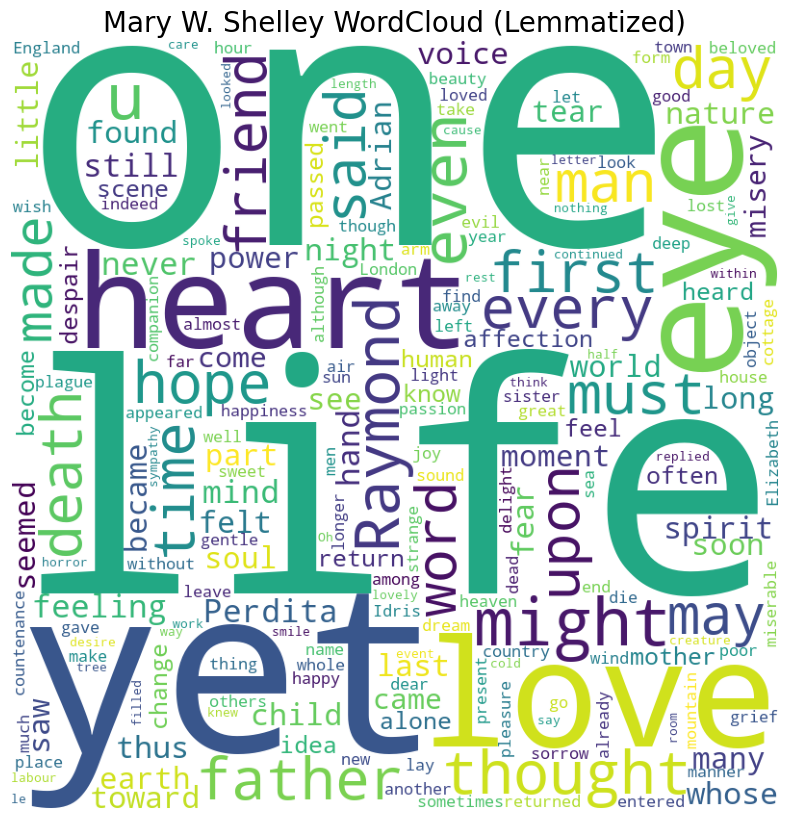

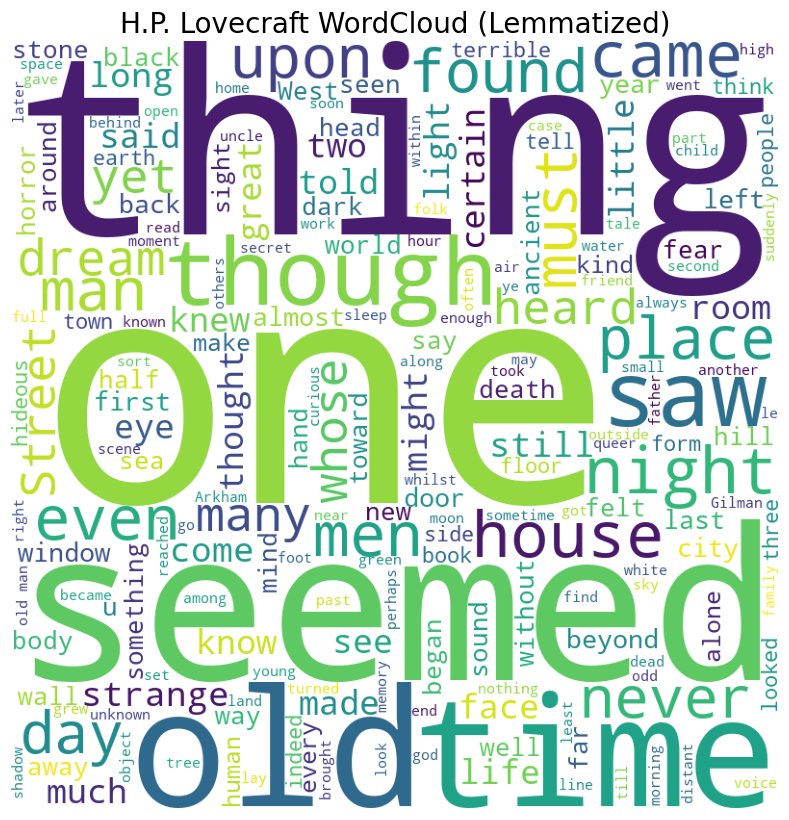

In [13]:
from nltk.stem import WordNetLemmatizer

# Initialiser le lemmatiseur
lemmatizer = WordNetLemmatizer()

# Fonction pour lemmatiser les tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatisation des tokens pour chaque auteur
poe_lemmatized_text = ' '.join([' '.join(lemmatize_tokens(tokens)) for tokens in train_filtered[train_filtered['Author'] == 'EAP']['Filtered_Text']])
shelley_lemmatized_text = ' '.join([' '.join(lemmatize_tokens(tokens)) for tokens in train_filtered[train_filtered['Author'] == 'MWS']['Filtered_Text']])
lovecraft_lemmatized_text = ' '.join([' '.join(lemmatize_tokens(tokens)) for tokens in train_filtered[train_filtered['Author'] == 'HPL']['Filtered_Text']])

# Générer les nuages de mots pour les textes lemmatisés
generate_wordcloud(poe_lemmatized_text, 'Edgar Allan Poe WordCloud (Lemmatized)')
generate_wordcloud(shelley_lemmatized_text, 'Mary W. Shelley WordCloud (Lemmatized)')
generate_wordcloud(lovecraft_lemmatized_text, 'H.P. Lovecraft WordCloud (Lemmatized)')

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer le vectoriseur TF-IdF
tfidf = TfidfVectorizer(stop_words='english')

# Ajuster le modèle sur les textes lemmatisés
tfs = tfidf.fit_transform([poe_lemmatized_text, shelley_lemmatized_text, lovecraft_lemmatized_text])

In [15]:
# Trouver les index des termes contenant "abandon"
abandon_terms_indices = [idx for idx, term in enumerate(tfidf.get_feature_names_out()) if "abandon" in term]

# Vérifier quelles lignes (documents) ont des valeurs non nulles pour ces termes
non_null_rows = np.any(tfs[:, abandon_terms_indices].toarray(), axis=1)

# Afficher les index des lignes où les termes "abandon" sont non-nuls
print("Lignes où les termes 'abandon' sont non-nuls :", np.where(non_null_rows)[0])

Lignes où les termes 'abandon' sont non-nuls : [0 1 2]


In [16]:
# Calculer la somme des scores TF-IDF pour chaque document (ligne)
scores = np.sum(tfs.toarray(), axis=1)

# Trier les documents en fonction des scores
sorted_indices = np.argsort(scores)[::-1]

# Sélectionner les 50 premiers documents avec les scores les plus élevés
top_50_indices = sorted_indices[:50]

# Associer les auteurs à ces documents
authors = ['EAP', 'MWS', 'HPL'] * tfs.shape[0]  # Répéter la liste des auteurs autant de fois que nécessaire
top_50_authors = [authors[i] for i in top_50_indices]

# Afficher les 50 extraits avec les scores TF-IDF les plus élevés et leurs auteurs associés
for i, (index, author) in enumerate(zip(top_50_indices, top_50_authors), start=1):
    print(f"{i}. Extrait : {[' '.join(tokens) for tokens in train_filtered[train_filtered['Author'] == author]['Filtered_Text'][index]]}")
    print(f"   Auteur : {author}\n")


1. Extrait : ['p r o c e s s', 'h o w e v e r', 'a f f o r d e d', 'm e a n s', 'a s c e r t a i n i n g', 'd i m e n s i o n s', 'd u n g e o n', 'm i g h t', 'm a k e', 'c i r c u i t', 'r e t u r n', 'p o i n t', 'w h e n c e', 's e t', 'w i t h o u t', 'a w a r e', 'f a c t', 'p e r f e c t l y', 'u n i f o r m', 's e e m e d', 'w a l l']
   Auteur : EAP

2. Extrait : ['H e r b e r t', 'W e s t', 'n e e d e d', 'f r e s h', 'b o d i e s', 'l i f e', 'w o r k', 'r e a n i m a t i o n', 'd e a d']
   Auteur : HPL

3. Extrait : ['y o u t h', 'p a s s e d', 's o l i t u d e', 'b e s t', 'y e a r s', 's p e n t', 'g e n t l e', 'f e m i n i n e', 'f o s t e r a g e', 'r e f i n e d', 'g r o u n d w o r k', 'c h a r a c t e r', 'o v e r c o m e', 'i n t e n s e', 'd i s t a s t e', 'u s u a l', 'b r u t a l i t y', 'e x e r c i s e d', 'b o a r d', 's h i p', 'n e v e r', 'b e l i e v e d', 'n e c e s s a r y', 'h e a r d', 'm a r i n e r', 'e q u a l l y', 'n o t e d', 'k i n d l i n e 

C:\Users\GRETA\AppData\Local\Temp\ipykernel_18384\1440494417.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
